In [211]:
# Global libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# For create train and test data sets
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [198]:
# Data path
data = "/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv"
# Load data
df = pd.read_csv(data)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [199]:
# Get a summary of data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [200]:
# Encoding categorical data
obj_cols = df.select_dtypes(['object']).columns
df[obj_cols] = df[obj_cols].astype('category')

# Store the categories for inverse decoding
categories = {}

for c in obj_cols:
    print(df[c].cat.categories)
    categories[c] = df[c].cat.categories
    
df[obj_cols] = df[obj_cols].apply(lambda x: x.cat.codes)
df

Index(['Female', 'Male', 'Other'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')
Index(['Rural', 'Urban'], dtype='object')
Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [201]:
# Clean data

clear_df = df.copy()

# The id data don't give relevant information
del clear_df['id']

# Unknown clasification it's complicated data
# Unknown was encoded by 0, so replace all 0's values for None
# This gonna reduce a lot the data set
# Maybe, it's a good idea to see the difference between delete the Unknown values
# and keep them
clear_df['smoking_status'] = clear_df['smoking_status'].replace([0],[None])

# Drop NaN values
clear_df = clear_df.dropna()

# Get the difference of shapes and get the lost percentage
original_shape = df.shape
clear_shape = clear_df.shape
print(f"Original Shape: {original_shape}")
print(f"Clear Shape: {clear_shape}")
print(f"Lost Percentage: {round(1-clear_shape[0]/original_shape[0],4)}")
clear_df

Original Shape: (5110, 12)
Clear Shape: (3426, 11)
Lost Percentage: 0.3295


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,1,3,0,71.97,28.3,2,0
5102,0,57.0,0,0,1,2,0,77.93,21.7,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0


In [202]:
# Summary of clean data
clear_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,0.391419,48.645943,0.119089,0.060128,0.758611,1.919148,0.509340,108.321891,30.290047,0.052539
std,0.488737,18.851239,0.323941,0.237759,0.427988,0.927850,0.499986,47.703541,7.295958,0.223145
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.237500,25.300000,0.000000
50%,0.000000,50.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.360000,29.100000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,2.000000,1.000000,116.207500,34.100000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000


In [203]:
# Correlation matrix
# Get the column of stroke classification in the correlation matrix
stroke_corr = clear_df.corr()['stroke']
clear_df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
gender,1.000000,0.043346,0.037439,0.101429,0.016336,-0.002303,-0.014368,0.070758,0.013219,0.012167
age,0.043346,1.000000,0.267098,0.260108,0.523289,0.008879,0.015824,0.233649,0.079666,0.242495
hypertension,0.037439,0.267098,1.000000,0.111707,0.116851,0.017473,-0.003264,0.168673,0.132635,0.143647
heart_disease,0.101429,0.260108,0.111707,1.000000,0.076684,0.014103,0.010011,0.143085,0.001288,0.138553
ever_married,0.016336,0.523289,0.116851,0.076684,1.000000,-0.063131,0.009857,0.118600,0.155502,0.071691
work_type,-0.002303,0.008879,0.017473,0.014103,-0.063131,1.000000,-0.004351,0.016277,-0.055860,0.023343
Residence_type,-0.014368,0.015824,-0.003264,0.010011,0.009857,-0.004351,1.000000,-0.012047,-0.008455,0.006068
avg_glucose_level,0.070758,0.233649,0.168673,0.143085,0.118600,0.016277,-0.012047,1.000000,0.156404,0.140453
bmi,0.013219,0.079666,0.132635,0.001288,0.155502,-0.055860,-0.008455,0.156404,1.000000,0.011673
stroke,0.012167,0.242495,0.143647,0.138553,0.071691,0.023343,0.006068,0.140453,0.011673,1.000000


In [204]:
# If the correlation is less than a low value,
# maybe it's better delete this parameter
# In this case the mininum correlation it's set in 0.05
min_corr = 0.12
del_cols = [i for i in stroke_corr.index if stroke_corr[i]<=min_corr]

try:
    for col in del_cols:
        del clear_df[col]
except:
    pass

clear_df.corr()['stroke']

age                  0.242495
hypertension         0.143647
heart_disease        0.138553
avg_glucose_level    0.140453
stroke               1.000000
Name: stroke, dtype: float64

In [205]:
# Show again the categories to analysis
categories

{'gender': Index(['Female', 'Male', 'Other'], dtype='object'),
 'ever_married': Index(['No', 'Yes'], dtype='object'),
 'work_type': Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object'),
 'Residence_type': Index(['Rural', 'Urban'], dtype='object'),
 'smoking_status': Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')}

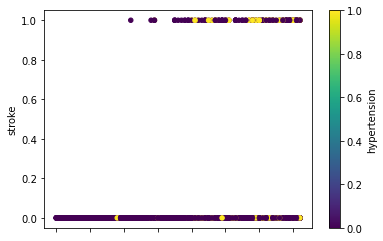

In [206]:
# Exploratory plot
try:
    clear_df.plot.scatter(x='age', y='stroke', c='hypertension', colormap='viridis')
except:
    pass

In [207]:
# Create the train and test data
import numpy as np
from sklearn.model_selection import train_test_split

y = clear_df['stroke']
X = clear_df.copy()
del X['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [213]:
# Decision Tree
from sklearn import tree
from sklearn.metrics import classification_report

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report['0'])
print(report['1'])

{'precision': 0.9453441295546559, 'recall': 0.9658738366080661, 'f1-score': 0.9554987212276215, 'support': 967}
{'precision': 0.175, 'recall': 0.11475409836065574, 'f1-score': 0.1386138613861386, 'support': 61}


In [209]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=75)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report['0'])
print(report['1'])

{'precision': 0.9418145956607495, 'recall': 0.9875904860392968, 'f1-score': 0.9641595153962644, 'support': 967}
{'precision': 0.14285714285714285, 'recall': 0.03278688524590164, 'f1-score': 0.05333333333333333, 'support': 61}


In [210]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report['0'])
print(report['1'])

{'precision': 0.9415204678362573, 'recall': 0.9989658738366081, 'f1-score': 0.9693928750627195, 'support': 967}
{'precision': 0.5, 'recall': 0.01639344262295082, 'f1-score': 0.031746031746031744, 'support': 61}
